#  2020AIML544 - CLASSIFICATION - ASSIGNMENT4

## CAR ACCEPTABILITY PREDICTION

## Overall Approach

### EDA TASKS PERFORMED:
    1. READ THE EXCEL FILE INTO A DATAFRAME  
    2. CHECK THE STATISTICS OF DATA USING DESCRIBE FUNCTION
    3. CHECK FOR DUPLICATE ROWS & NULL VALUES 
    4. CHANGE TO APPROPRIATE DATATYPES    
    5. PAIRPLOTS & BARGRAPHS OF ATTRIBUTES
    6. UNIVARIATE ANALYSIS 
    7. BIVARIATE ANALYSIS & HEATMAP TO SHOW CORRELATION

### MODEL BUILDING:
    1. STRATIFIED TRAIN TEST SPLIT 
    2. FEATURE SCALING USING STANDARD SCALER
    3. BUILD SVM MODEL - "ONE VS ONE" APPROACH(DUE TO CLASS IMBALANCE)
       A. WITH LINEAR KERNEL
       B. WITH POLYNOMIAL KERNEL
       C. WITH GAUSSIAN RADIAL BASIS FUNCTION KERNEL
       D. WITH SIGMOID KERNEL
    4. BUILD 5-FOLD CROSS-VALIDATION MODELS FOR THESE METHODS
        
### MODEL PERFORMANCE ANALYSIS:
    1. FIND ACCURACY SCORES & F1 SCORES
    2. PRINT CONFUSION MATRIX & CLASSIFICATION REPORTS
    3. GRIDSEARCH CV FOR RADIAL BASIS FUNCTION KERNEL
    4. FIND THE BEST KERNEL METHOD FOR SVM MODEL 

#### Import all needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV 

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## EXPLORATORY DATA ANALYSIS 

### <span style='background : yellow' > **Q-1: Import the data dataset from given URL:**   </span>

#### Read the input excel file into a dataframe

In [2]:
url =  "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

header = ['buying_price', 'maint_price', 'num_doors', 'num_persons', 'lug_boot', 'safety', 'output_class']

df = pd.read_csv(url, names = header)

#### Display information about the dataframe using head function

In [3]:
df.head()

,buying_price,maint_price,num_doors,num_persons,lug_boot,safety,output_class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### Check the number of records in the dataset using shape function

In [4]:
df.shape

(1728, 7)

There are 1728 records and 7 attributes in the dataset.

Let's take a quick look at the columns

In [5]:
df.columns

Index(['buying_price', 'maint_price', 'num_doors', 'num_persons', 'lug_boot',
       'safety', 'output_class'],
      dtype='object')

#### Check the statistics of attributes using describe function. 

In [6]:
df.describe()

,buying_price,maint_price,num_doors,num_persons,lug_boot,safety,output_class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,5more,more,med,low,unacc
freq,432,432,432,576,576,576,1210


**Observation:** This is the statistical summary of the data. Since our attributes are categorical, we cannot see the mean, median values, instead can find the unique values and top occurances

### <span style='color: Black'>Data Cleaning </span>

<b>
Checking for duplicate rows
</b>

**Observation:** There are no duplicate rows in our dataset

In [7]:
dv = df.duplicated(keep=False)
dv.sum()

0

### <span style='color: Black'>Missing Values Imputation </span>

**Observation:** There are no Null values in the data. 

In [8]:
df.isnull().sum()

buying_price    0
maint_price     0
num_doors       0
num_persons     0
lug_boot        0
safety          0
output_class    0
dtype: int64

<b>
Check the quality of the data and data types of each column using info function
</b>

**Observation:** The datatype of all the attributes is object, we need to do numerical encoding for model building purpose.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying_price  1728 non-null   object
 1   maint_price   1728 non-null   object
 2   num_doors     1728 non-null   object
 3   num_persons   1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   output_class  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


<b> Converting categorical to numerical encoding - ordinal values </b>

In [10]:
df1 = df.copy()

cleanup_nums = {"buying_price": {"vhigh": 1, "high": 2, "med": 3, "low": 4 },
               "maint_price": {"vhigh": 1, "high": 2, "med": 3, "low": 4},
               "num_doors": {"2": 2, "3": 3, "4": 4, "5more": 5},
               "num_persons": {"2": 2, "4": 4, "more": 5},
               "lug_boot": {"small": 1, "med": 2, "big": 3},
               "safety": {"low": 1, "med": 2, "high": 3},
               "output_class": {"unacc": 1, "acc": 2, "good": 3, "vgood": 4}
               }

df1 = df1.replace(cleanup_nums)
df1.head()

,buying_price,maint_price,num_doors,num_persons,lug_boot,safety,output_class
0,1,1,2,2,1,1,1
1,1,1,2,2,1,2,1
2,1,1,2,2,1,3,1
3,1,1,2,2,2,1,1
4,1,1,2,2,2,2,1


In [11]:
# All the datatypes are "int" now
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   buying_price  1728 non-null   int64
 1   maint_price   1728 non-null   int64
 2   num_doors     1728 non-null   int64
 3   num_persons   1728 non-null   int64
 4   lug_boot      1728 non-null   int64
 5   safety        1728 non-null   int64
 6   output_class  1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


### <span style='background : yellow' > **Q-2: Extract X as all columns except the last column and Y as the last column.

In [12]:
X = df1.drop('output_class', axis=1)
# X = df1[['buying_price', 'safety']]
y = df1['output_class']

### <span style='background : yellow' > **Q-3: Data Visualization (using Pairplots & Bargraphs)

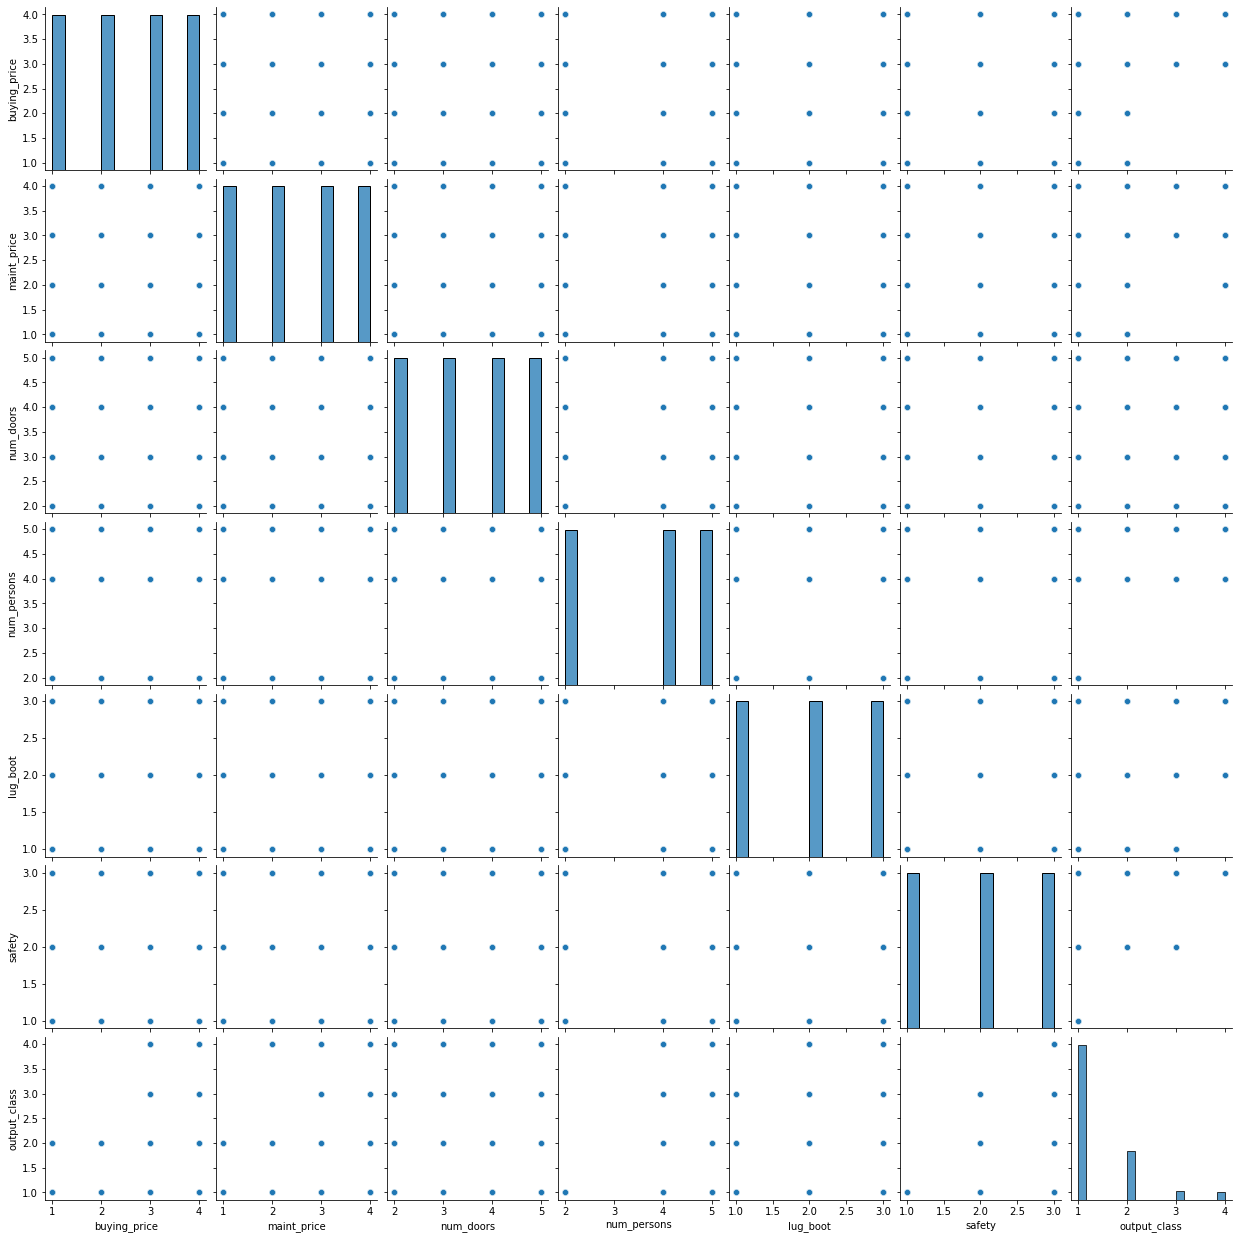

In [13]:
sns.pairplot(df1)

### UNIVARIATE ANALYSIS - BARGRAPHS

<AxesSubplot:title={'center':'num_doors'}>

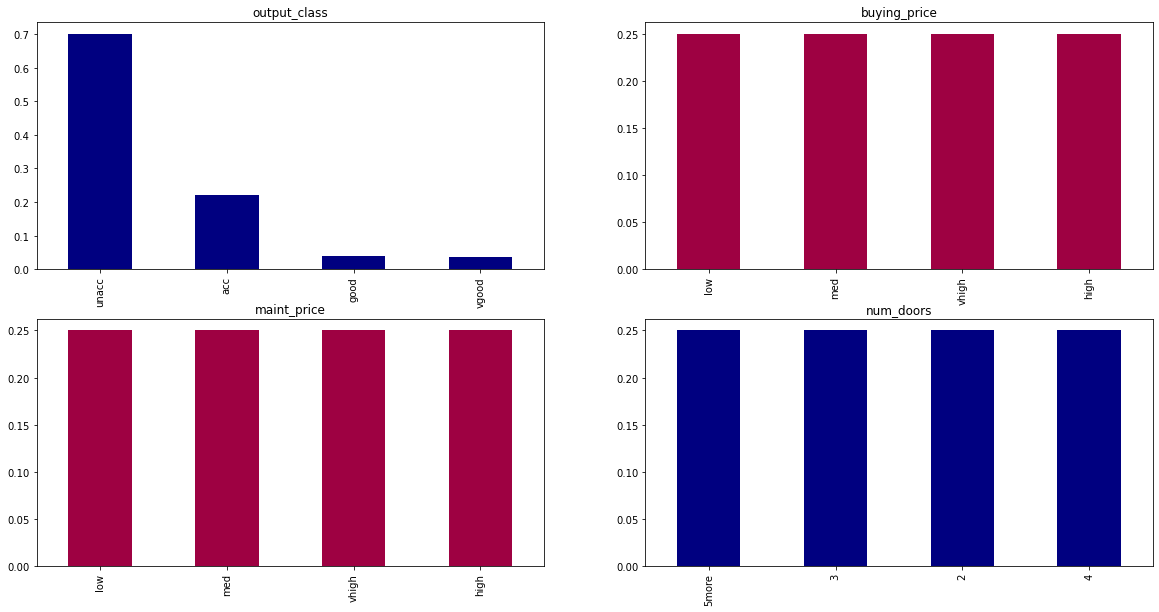

In [14]:
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')
df['output_class'].value_counts().plot.barh(cmap=cmap)

plt.figure(1)

plt.subplot(221) 
df['output_class'].value_counts(normalize=True).plot.bar(figsize=(20,10), cmap=cmap, title= 'output_class') 

plt.subplot(222) 
df['buying_price'].value_counts(normalize=True).plot.bar(title= 'buying_price', cmap=cmap1) 

plt.subplot(223) 
df['maint_price'].value_counts(normalize=True).plot.bar(title= 'maint_price', cmap=cmap1) 

plt.subplot(224) 
df['num_doors'].value_counts(normalize=True).plot.bar(title= 'num_doors', cmap=cmap)

<AxesSubplot:title={'center':'safety'}>

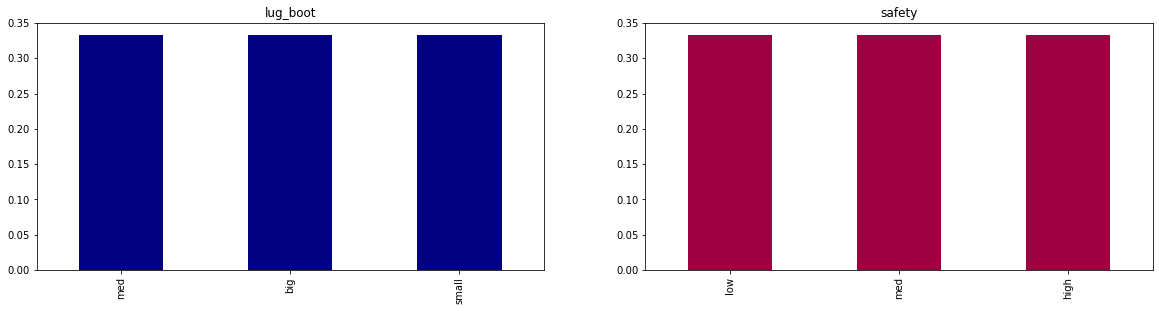

In [15]:
plt.figure(2)

plt.subplot(221) 
df['lug_boot'].value_counts(normalize=True).plot.bar(figsize=(20,10), cmap=cmap, title= 'lug_boot') 

plt.subplot(222) 
df['safety'].value_counts(normalize=True).plot.bar(title= 'safety', cmap=cmap1) 

### <span style='background : yellow' > **Q-4: VISUALIZE CORRELATION BETWEEN ALL THE VARIABLE
### BIVARIATE ANALYSIS

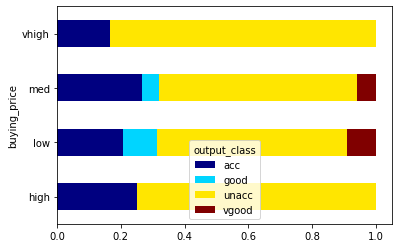

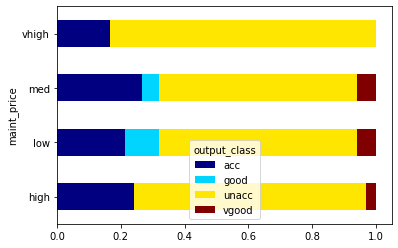

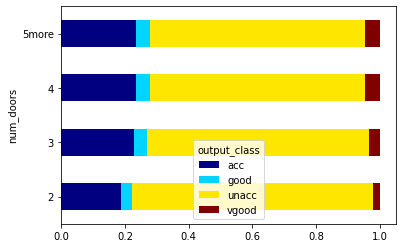

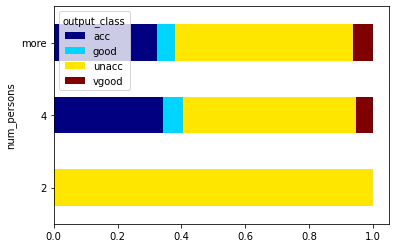

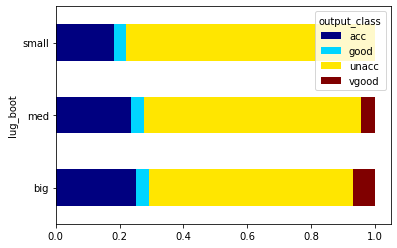

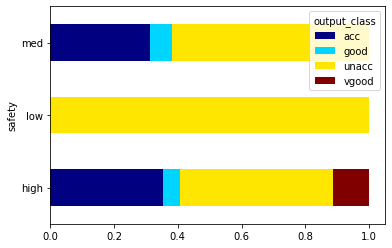

In [16]:
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')

for (columnName, columnData) in df.iteritems():
    if columnName != 'output_class':
        Bivariate_Plot = pd.crosstab(df[columnName],df['output_class'])
        Bivariate_Plot.div(Bivariate_Plot.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
        plt.show()

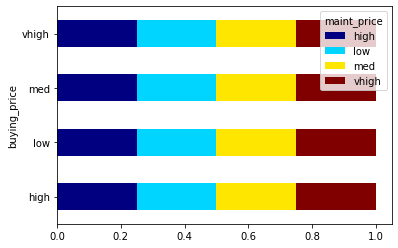

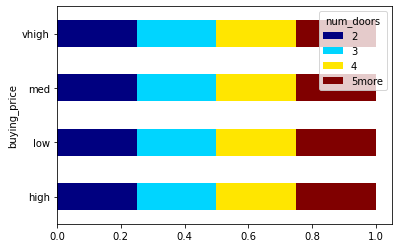

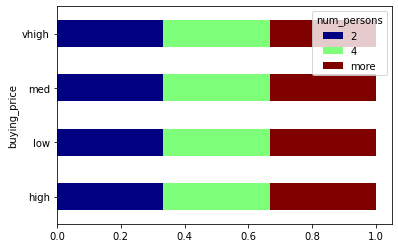

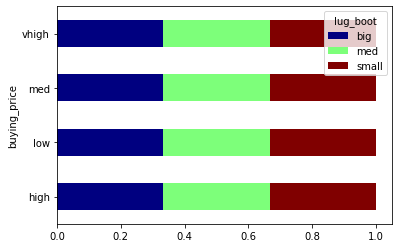

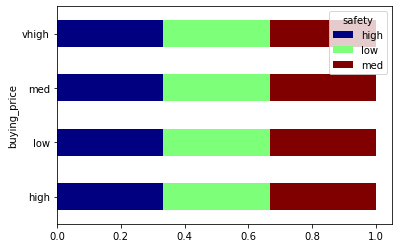

In [17]:
day=pd.crosstab(df['buying_price'],df['maint_price']) 
day.div(day.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

Surge=pd.crosstab(df['buying_price'],df['num_doors']) 
Surge.div(Surge.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

Time=pd.crosstab(df['buying_price'],df['num_persons']) 
Time.div(Time.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

status=pd.crosstab(df['buying_price'],df['lug_boot']) 
status.div(status.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

day=pd.crosstab(df['buying_price'],df['safety']) 
day.div(day.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

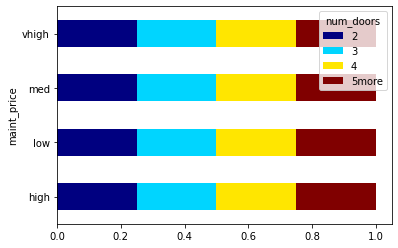

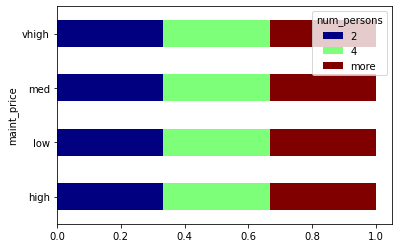

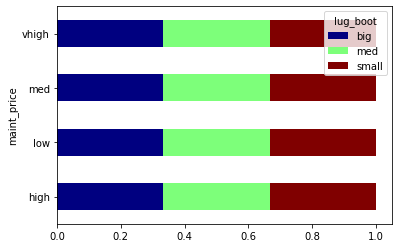

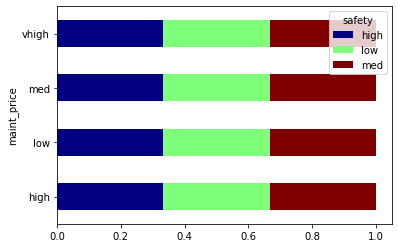

In [18]:
Surge=pd.crosstab(df['maint_price'],df['num_doors']) 
Surge.div(Surge.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

Time=pd.crosstab(df['maint_price'],df['num_persons']) 
Time.div(Time.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

status=pd.crosstab(df['maint_price'],df['lug_boot']) 
status.div(status.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

day=pd.crosstab(df['maint_price'],df['safety']) 
day.div(day.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

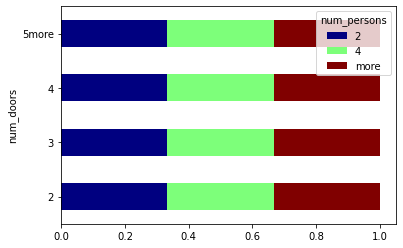

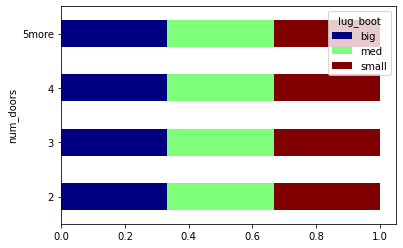

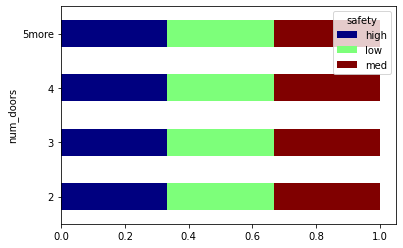

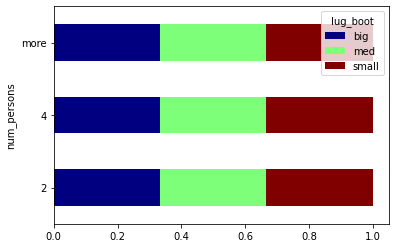

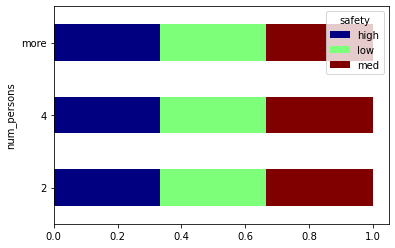

In [19]:
Time=pd.crosstab(df['num_doors'],df['num_persons']) 
Time.div(Time.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

status=pd.crosstab(df['num_doors'],df['lug_boot']) 
status.div(status.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

day=pd.crosstab(df['num_doors'],df['safety']) 
day.div(day.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

day=pd.crosstab(df['num_persons'],df['lug_boot']) 
day.div(day.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

day=pd.crosstab(df['num_persons'],df['safety']) 
day.div(day.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True) 
plt.show()

<span style='color:Black'>
<b>

HEATMAP TO CHECK CORRELATION 
</b>
</span>


<AxesSubplot:>

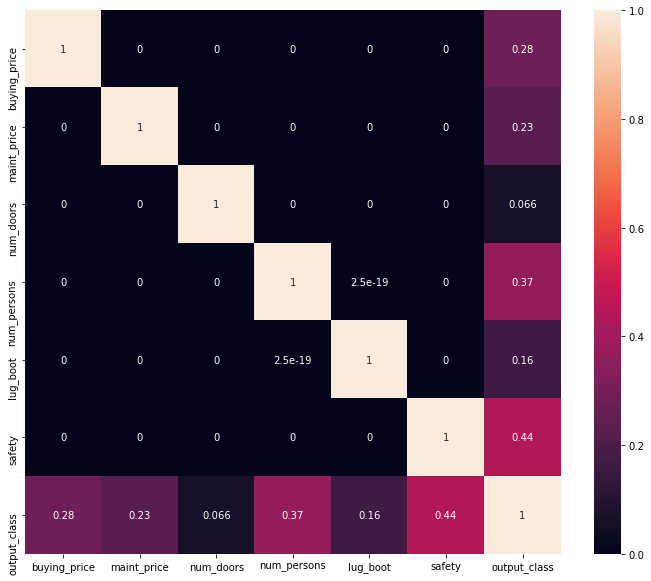

In [20]:
plt.figure(figsize=(12, 10))
correlation = df1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

### <span style='background : yellow' > **Q-5: Feature Scaling:**   </span>

In [21]:
sc = StandardScaler()

X = sc.fit_transform(X)

### <span style='background : yellow' > **Q-6: Stratified Train-Test Split**   </span>

#### <span style='color:Black'> Now lets start to prepare our data for Modeling. For this, I am going to split the data into 75:25 for traindata:testdata
#### Tried 80:20 & 70:30 split ratios however 75:25 gives better accuracy scores. After splitting I'll scale the data using Standard Scaler. 
#### StandardScaler follows Standard Normal Distribution. Therefore, it makes mean = 0 and scales the data to unit variance.
</span>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y) 

### <span style='background : yellow' > **Q-8: Build SVM model for the dataset**   </span>

### BUILD "ONE VS ONE" SVM MODELS FOR DIFFERENT KERNEL METHODS

In [23]:
linear = SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly   = SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf    = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig    = SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

# print("Linear SVM support vectors:\n", linear.support_vectors_)
# print("Polynomial SVM support vectors:\n", poly.support_vectors_)
# print("RBF SVM support vectors:\n", rbf.support_vectors_)
# print("Sigmoid SVM support vectors:\n", sig.support_vectors_)

In [24]:
y_test_pred_lin = linear.predict(X_test)
f1_SVC_lin = f1_score(y_test, y_test_pred_lin, average='weighted')

y_test_pred_poly = poly.predict(X_test)
f1_SVC_poly = f1_score(y_test, y_test_pred_poly, average='weighted')

y_test_pred_rbf = rbf.predict(X_test)
f1_SVC_rbf = f1_score(y_test, y_test_pred_rbf, average='weighted')

y_test_pred_sig = sig.predict(X_test)
f1_SVC_sig = f1_score(y_test, y_test_pred_sig, average='weighted')

### <span style='background : yellow' > **Q-9: Print CONFUSION MATRIX & CLASSIFICATION REPORTS**   </span>

In [25]:
print('\n\n CONFUSION MATRIX for linear SVM\n\n', confusion_matrix(y_test, y_test_pred_lin))
print('\n\n CLASSIFICATION REPORT for linear SVM\n\n', classification_report(y_test, y_test_pred_lin))



 CONFUSION MATRIX for linear SVM

 [[292  10   0   1]
 [ 31  64   1   0]
 [  1   0  15   1]
 [  0   3   1  12]]


 CLASSIFICATION REPORT for linear SVM

               precision    recall  f1-score   support

           1       0.90      0.96      0.93       303
           2       0.83      0.67      0.74        96
           3       0.88      0.88      0.88        17
           4       0.86      0.75      0.80        16

    accuracy                           0.89       432
   macro avg       0.87      0.82      0.84       432
weighted avg       0.88      0.89      0.88       432



In [26]:
print('\n\n CONFUSION MATRIX for polynomial SVM\n\n', confusion_matrix(y_test, y_test_pred_poly))
print('\n\n CLASSIFICATION REPORT for polynomial SVM\n\n', classification_report(y_test, y_test_pred_poly))



 CONFUSION MATRIX for polynomial SVM

 [[296   7   0   0]
 [ 27  68   1   0]
 [  2   4  10   1]
 [  0   2   0  14]]


 CLASSIFICATION REPORT for polynomial SVM

               precision    recall  f1-score   support

           1       0.91      0.98      0.94       303
           2       0.84      0.71      0.77        96
           3       0.91      0.59      0.71        17
           4       0.93      0.88      0.90        16

    accuracy                           0.90       432
   macro avg       0.90      0.79      0.83       432
weighted avg       0.90      0.90      0.89       432



In [27]:
print('\n\n CONFUSION MATRIX for gaussian rbf SVM\n\n', confusion_matrix(y_test, y_test_pred_rbf))
print('\n\n CLASSIFICATION REPORT for gaussian rbf SVM\n\n', classification_report(y_test, y_test_pred_rbf))



 CONFUSION MATRIX for gaussian rbf SVM

 [[300   3   0   0]
 [  4  92   0   0]
 [  0   1  15   1]
 [  0   1   1  14]]


 CLASSIFICATION REPORT for gaussian rbf SVM

               precision    recall  f1-score   support

           1       0.99      0.99      0.99       303
           2       0.95      0.96      0.95        96
           3       0.94      0.88      0.91        17
           4       0.93      0.88      0.90        16

    accuracy                           0.97       432
   macro avg       0.95      0.93      0.94       432
weighted avg       0.97      0.97      0.97       432



In [28]:
print('\n\n CONFUSION MATRIX for sigmoid SVM\n\n', confusion_matrix(y_test, y_test_pred_sig))
print('\n\n CLASSIFICATION REPORT for sigmoid SVM\n\n', classification_report(y_test, y_test_pred_sig))



 CONFUSION MATRIX for sigmoid SVM

 [[275  25   2   1]
 [ 47  47   1   1]
 [  3   9   4   1]
 [  1   5   2   8]]


 CLASSIFICATION REPORT for sigmoid SVM

               precision    recall  f1-score   support

           1       0.84      0.91      0.87       303
           2       0.55      0.49      0.52        96
           3       0.44      0.24      0.31        17
           4       0.73      0.50      0.59        16

    accuracy                           0.77       432
   macro avg       0.64      0.53      0.57       432
weighted avg       0.76      0.77      0.76       432



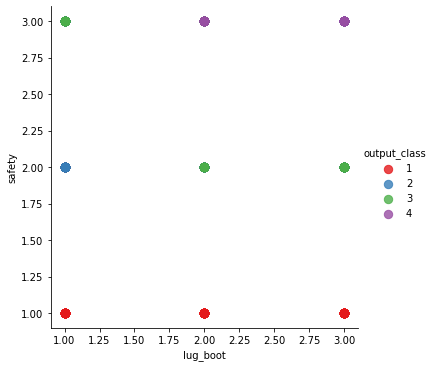

In [29]:
# Plot two features - just for an idea. Since we have 6 features, it will be a 6-Dimensional and difficult to visualize
sns.lmplot('lug_boot','safety', data=df1, hue='output_class', palette='Set1', fit_reg=False, scatter_kws={"s": 70});

### <span style='background : yellow' > **Q-7: Perform 5-fold cross-validation**   </span>

### Linear SVM - 5-fold cross-validation

In [30]:
print("cross validation scores:\n\n", cross_val_score(linear, X_train, y_train, cv=5, scoring='accuracy'))

y_test_pred = cross_val_predict(linear, X_test, y_test, cv=5)

f1_CV_lin = f1_score(y_test, y_test_pred, average='weighted')

print('\n\n CONFUSION MATRIX \n\n', pd.crosstab(y_test,y_test_pred,rownames=['Predicted'],colnames=['True'],margins=True))
print('\n\n CLASSIFICATION REPORT \n\n', classification_report(y_test, y_test_pred))

cross validation scores:

 [0.84615385 0.84169884 0.86872587 0.86100386 0.88416988]


 CONFUSION MATRIX 

 True         1   2   3   4  All
Predicted                      
1          287  15   1   0  303
2           28  66   1   1   96
3            1   6   9   1   17
4            0   2   3  11   16
All        316  89  14  13  432


 CLASSIFICATION REPORT 

               precision    recall  f1-score   support

           1       0.91      0.95      0.93       303
           2       0.74      0.69      0.71        96
           3       0.64      0.53      0.58        17
           4       0.85      0.69      0.76        16

    accuracy                           0.86       432
   macro avg       0.78      0.71      0.75       432
weighted avg       0.86      0.86      0.86       432



### Polynomial SVM - 5-fold cross-validation

In [31]:
print("cross validation scores:\n\n", cross_val_score(poly, X_train, y_train, cv=5, scoring='accuracy'))

y_test_pred = cross_val_predict(poly, X_test, y_test, cv=5)

f1_CV_poly = f1_score(y_test, y_test_pred, average='weighted')

print('\n\n CONFUSION MATRIX \n\n', pd.crosstab(y_test,y_test_pred,rownames=['Predicted'],colnames=['True'],margins=True))
print('\n\n CLASSIFICATION REPORT \n\n', classification_report(y_test, y_test_pred))

cross validation scores:

 [0.86538462 0.88416988 0.88416988 0.87258687 0.9034749 ]


 CONFUSION MATRIX 

 True         1   2  3   4  All
Predicted                     
1          293  10  0   0  303
2           41  54  1   0   96
3            2   8  6   1   17
4            1   3  2  10   16
All        337  75  9  11  432


 CLASSIFICATION REPORT 

               precision    recall  f1-score   support

           1       0.87      0.97      0.92       303
           2       0.72      0.56      0.63        96
           3       0.67      0.35      0.46        17
           4       0.91      0.62      0.74        16

    accuracy                           0.84       432
   macro avg       0.79      0.63      0.69       432
weighted avg       0.83      0.84      0.83       432



### Gaussian Radial Basis Function - 5-fold cross-validation

In [32]:
print("cross validation scores:\n\n", cross_val_score(rbf, X_train, y_train, cv=5, scoring='accuracy'))

y_test_pred = cross_val_predict(rbf, X_test, y_test, cv=5)

f1_CV_rbf = f1_score(y_test, y_test_pred, average='weighted')

print('\n\n CONFUSION MATRIX \n\n', pd.crosstab(y_test,y_test_pred,rownames=['Predicted'],colnames=['True'],margins=True))
print('\n\n CLASSIFICATION REPORT \n\n', classification_report(y_test, y_test_pred))

cross validation scores:

 [0.96538462 0.96525097 0.97683398 0.96138996 0.98069498]


 CONFUSION MATRIX 

 True         1   2  3  4  All
Predicted                    
1          302   1  0  0  303
2           20  74  1  1   96
3            9   8  0  0   17
4            4   4  0  8   16
All        335  87  1  9  432


 CLASSIFICATION REPORT 

               precision    recall  f1-score   support

           1       0.90      1.00      0.95       303
           2       0.85      0.77      0.81        96
           3       0.00      0.00      0.00        17
           4       0.89      0.50      0.64        16

    accuracy                           0.89       432
   macro avg       0.66      0.57      0.60       432
weighted avg       0.85      0.89      0.87       432



### Sigmoid SVM - 5-fold cross-validation

In [33]:
print("cross validation scores:\n\n", cross_val_score(sig, X_train, y_train, cv=5, scoring='accuracy'))

y_test_pred = cross_val_predict(sig, X_test, y_test, cv=5)

f1_CV_sig = f1_score(y_test, y_test_pred, average='weighted')

print('\n\n CONFUSION MATRIX \n\n', pd.crosstab(y_test,y_test_pred,rownames=['Predicted'],colnames=['True'],margins=True))
print('\n\n CLASSIFICATION REPORT \n\n', classification_report(y_test, y_test_pred))

cross validation scores:

 [0.74230769 0.74131274 0.77220077 0.77220077 0.77606178]


 CONFUSION MATRIX 

 True         1   2  3  4  All
Predicted                    
1          284  17  1  1  303
2           39  57  0  0   96
3            3  12  2  0   17
4            1  10  1  4   16
All        327  96  4  5  432


 CLASSIFICATION REPORT 

               precision    recall  f1-score   support

           1       0.87      0.94      0.90       303
           2       0.59      0.59      0.59        96
           3       0.50      0.12      0.19        17
           4       0.80      0.25      0.38        16

    accuracy                           0.80       432
   macro avg       0.69      0.47      0.52       432
weighted avg       0.79      0.80      0.79       432



### Cross Validation using GRIDSEARCHCV for RBF kernel method

In [34]:
pipeline = Pipeline([('clf', SVC(kernel='rbf', C=1, gamma=0.1))]) 

params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1, cv=5, verbose=1, scoring='accuracy') 

svm_grid_rbf.fit(X_train, y_train) 

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:   12.4s finished


GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             scoring='accuracy', verbose=1)

In [35]:
svm_grid_rbf.best_score_

best = svm_grid_rbf.best_estimator_.get_params() 

for k in sorted(params.keys()): 
    print('Best hyperparameters \t{0}: \t {1:.2f}'.format(k, best[k]))
    

Best hyperparameters 	clf__C: 	 5.00
Best hyperparameters 	clf__gamma: 	 0.50


### With test dataset

In [36]:
y_test_pred = svm_grid_rbf.predict(X_test)

f1_gridCV_rbf = f1_score(y_test, y_test_pred, average='weighted')

print('\n\n CONFUSION MATRIX \n\n', pd.crosstab(y_test,y_test_pred,rownames=['Predicted'],colnames=['True'],margins=True))
print('\n\n CLASSIFICATION REPORT \n\n', classification_report(y_test, y_test_pred))



 CONFUSION MATRIX 

 True         1   2   3   4  All
Predicted                      
1          302   1   0   0  303
2            0  96   0   0   96
3            0   0  17   0   17
4            0   0   0  16   16
All        302  97  17  16  432


 CLASSIFICATION REPORT 

               precision    recall  f1-score   support

           1       1.00      1.00      1.00       303
           2       0.99      1.00      0.99        96
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        16

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



### DETERMINE THE WINNER

In [37]:
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

models=['Linear SVC','Polynomial SVC','Gaussian RBF SVC','Sigmoid SVC','Linear CV', 'Polynomial CV','Gaussian RBF CV','Sigmoid CV','GridSearch RBF SVC']
fig = go.Figure(data=[
    go.Bar(name='f1_score', x=models, y=[f1_SVC_lin, f1_SVC_poly, f1_SVC_rbf, f1_SVC_sig, f1_CV_lin, f1_CV_poly, f1_CV_rbf, f1_CV_sig, f1_gridCV_rbf])])
fig.show()

### CONCLUSION:

**As per the above graph, GridsearchCV for Gaussian RBF yields better f1 score.**

**5-fold cross-validation for all the methods yielded lesser f1 score when compared to actual models.**

**Also, out of different kernel methods, Gaussian Radial Basis Function SVM seems to be giving the best score.**